In [1]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)
library(NatParksPalettes)
library(readr)
libray(ggvenn)
library(ggVennDiagram)
library(readxl)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    muta

ERROR: Error in library(compositions): there is no package called ‘compositions’


In [2]:
olink_master <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/master_combined_Olink_DEPs_FvsM.csv")


head(olink_master)

,X.1,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Sex
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1,cohort.cohortGuidBR2,0.014084760,0.32010931,0.04399985,9.650871e-01,Age,GYS1,0.00997620,0.018938538,1.00000000,F
2,2,cohort.cohortGuidBR21,0.376308726,0.08035168,4.68327128,2.349236e-05,Age,THPO,0.76754320,0.389521308,0.03371154,F
3,3,cohort.cohortGuidBR22,0.149121132,0.10279043,1.45072969,1.533592e-01,Age,CLEC1A,0.27795947,0.150093769,1.00000000,F
4,4,cohort.cohortGuidBR23,0.063681226,0.06761780,0.94178194,3.510202e-01,Age,ENTPD6,0.15037582,0.058399538,1.00000000,F
5,5,cohort.cohortGuidBR24,-0.007663344,0.19752234,-0.03879735,9.692129e-01,Age,CEACAM8,-0.03573175,-0.008413308,1.00000000,F
6,6,cohort.cohortGuidBR25,0.305021773,0.14688491,2.07660387,4.321507e-02,Age,S100P,NA,0.338451538,1.00000000,F


In [3]:
data <- olink_master%>% mutate(Expression = case_when(diff >=0.1 & padj <= 0.05 ~ "Up-regulated-BR2",
                                                     diff <= -0.1 & padj <= 0.05 ~ "Down-regulated-BR2",
                                                     TRUE ~ "Unchanged"))
head(data)
unique(data$Expression)

,X.1,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Sex,Expression
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,cohort.cohortGuidBR2,0.014084760,0.32010931,0.04399985,9.650871e-01,Age,GYS1,0.00997620,0.018938538,1.00000000,F,Unchanged
2,2,cohort.cohortGuidBR21,0.376308726,0.08035168,4.68327128,2.349236e-05,Age,THPO,0.76754320,0.389521308,0.03371154,F,Up-regulated-BR2
3,3,cohort.cohortGuidBR22,0.149121132,0.10279043,1.45072969,1.533592e-01,Age,CLEC1A,0.27795947,0.150093769,1.00000000,F,Unchanged
4,4,cohort.cohortGuidBR23,0.063681226,0.06761780,0.94178194,3.510202e-01,Age,ENTPD6,0.15037582,0.058399538,1.00000000,F,Unchanged
5,5,cohort.cohortGuidBR24,-0.007663344,0.19752234,-0.03879735,9.692129e-01,Age,CEACAM8,-0.03573175,-0.008413308,1.00000000,F,Unchanged
6,6,cohort.cohortGuidBR25,0.305021773,0.14688491,2.07660387,4.321507e-02,Age,S100P,NA,0.338451538,1.00000000,F,Unchanged


[1] "Unchanged"          "Up-regulated-BR2"   "Down-regulated-BR2"

In [41]:
# top <- 30
# top_genes <- bind_rows(
#   data %>% 
#     filter(Expression == 'Up-regulated-BR2') %>% 
#     arrange(padj, desc(abs(diff))) %>% 
#     head(top),
#   data %>% 
#     filter(Expression == 'Down-regulated-BR2') %>% 
#     arrange(padj, desc(abs(diff))) %>% 
#     head(top))

# Four group Venn

In [8]:
# Apply condition to update column3
df <- data %>%
  mutate(facet = case_when(
    Sex == "F" & Expression == "Up-regulated-BR2" ~ "Female_BR2",
    Sex == "F" & Expression == "Down-regulated-BR2" ~ "Female_BR1",
    Sex == "M" & Expression == "Up-regulated-BR2" ~ "Male_BR2",
    Sex == "M" & Expression == "Down-regulated-BR2" ~ "Male_BR1",
    TRUE ~ "Unchanged"
  ))

In [9]:
head(df)

,X.1,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Sex,Expression,facet
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,cohort.cohortGuidBR2,0.014084760,0.32010931,0.04399985,9.650871e-01,Age,GYS1,0.00997620,0.018938538,1.00000000,F,Unchanged,Unchanged
2,2,cohort.cohortGuidBR21,0.376308726,0.08035168,4.68327128,2.349236e-05,Age,THPO,0.76754320,0.389521308,0.03371154,F,Up-regulated-BR2,Female_BR2
3,3,cohort.cohortGuidBR22,0.149121132,0.10279043,1.45072969,1.533592e-01,Age,CLEC1A,0.27795947,0.150093769,1.00000000,F,Unchanged,Unchanged
4,4,cohort.cohortGuidBR23,0.063681226,0.06761780,0.94178194,3.510202e-01,Age,ENTPD6,0.15037582,0.058399538,1.00000000,F,Unchanged,Unchanged
5,5,cohort.cohortGuidBR24,-0.007663344,0.19752234,-0.03879735,9.692129e-01,Age,CEACAM8,-0.03573175,-0.008413308,1.00000000,F,Unchanged,Unchanged
6,6,cohort.cohortGuidBR25,0.305021773,0.14688491,2.07660387,4.321507e-02,Age,S100P,NA,0.338451538,1.00000000,F,Unchanged,Unchanged


In [10]:
unique(df$facet)

[1] "Unchanged"  "Female_BR2" "Female_BR1" "Male_BR2"   "Male_BR1"

In [19]:
# Split the data into two sets: DEGs_Male and DEGs_Female
Female_BR2 <- df[df$facet == "Female_BR2", "Assay"]
Female_BR1 <- df[df$facet == "Female_BR1", "Assay"]
Male_BR2 <- df[df$facet == "Male_BR2", "Assay"]
Male_BR1 <- df[df$facet == "Male_BR1", "Assay"]


# Combine the two sets into one list variable 'a'
a <- list(`Female BR2` = Female_BR2, Female_BR1=Female_BR1, Male_BR2= Male_BR2,  Male_BR1=Male_BR1  )
a

$`Female BR2`
 [1] "THPO"     "ACTA2"    "SIGLEC7"  "SOST"     "NPDC1"    "CTSL"    
 [7] "THBD"     "FAM3C"    "TINAGL1"  "GDF15"    "LTBP2"    "CRTAC1"  
[13] "MCAM"     "IL18BP"   "CD46"     "ANGPTL3"  "EFEMP1"   "WNT9A"   
[19] "ITGA11"   "CXCL17"   "PGF"      "CCL25"    "LGALS9"   "GFAP"    
[25] "CD302"    "DTX3"     "AMBP"     "RSPO3"    "ITGAV"    "F3"      
[31] "EDA2R"    "WFDC2"    "NEFL"     "CDCP1"    "SCARB2"   "SCARF2"  
[37] "JAM2"     "CGA"      "TFF1"     "TNFRSF1A"

$Female_BR1
[1] "PROK1" "CTSV"  "PAEP" 

$Male_BR2
 [1] "ACTA2"  "SOST"   "GDF15"  "LTBP2"  "DPT"    "WNT9A"  "MLN"    "CXCL17"
 [9] "FLT3LG" "EDA2R"  "WFDC2"  "SCARF2" "IGFBP4"

$Male_BR1
[1] "RET"

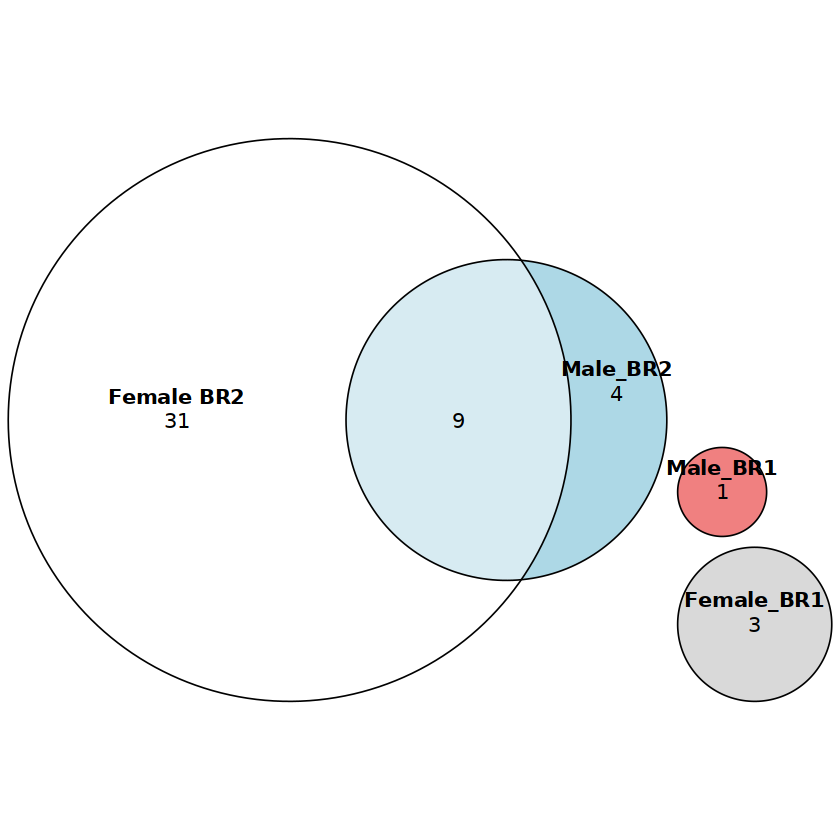

In [20]:
library(eulerr)
#plot(venn(a))
plot(euler(a, shape = "ellipse"), quantities = TRUE)

# Female only Venn diagram BR1vsBR2

In [8]:
olink_female <- data %>% filter(Sex == 'F', padj <=0.05)
head(olink_female)
unique(olink_female$Expression)

,X.1,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Sex,Expression
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2,cohort.cohortGuidBR21,0.3763087,0.08035168,4.683271,2.349236e-05,Age,THPO,0.7675432,0.3895213,3.371154e-02,F,Up-regulated-BR2
2,65,cohort.cohortGuidBR264,0.6177760,0.10530276,5.866665,4.004721e-07,Age,ACTA2,NA,0.6214094,5.842887e-04,F,Up-regulated-BR2
3,116,cohort.cohortGuidBR2115,0.4069968,0.08789724,4.630371,2.803191e-05,Age,SIGLEC7,1.2436459,0.3363161,4.016973e-02,F,Up-regulated-BR2
4,130,cohort.cohortGuidBR2129,0.7542238,0.11809923,6.386357,6.424623e-08,Age,SOST,2.0904355,0.7411938,9.386375e-05,F,Up-regulated-BR2
5,131,cohort.cohortGuidBR2130,0.5207877,0.08764225,5.942199,3.072049e-07,Age,NPDC1,1.0241902,0.4964650,4.485191e-04,F,Up-regulated-BR2
6,154,cohort.cohortGuidBR2153,0.3832704,0.08357015,4.586212,3.247092e-05,Age,CTSL,2.9751690,0.3706018,4.643341e-02,F,Up-regulated-BR2


[1] "Up-regulated-BR2"   "Down-regulated-BR2"

In [14]:
# Filter data for IL1B+ CD14 monocytes
degs_BR2 <- olink_female[olink_female$Expression == "Up-regulated-BR2", "Assay"]

# Filter data for all non-IL1B+ CD14 monocytes
degs_BR1 <- olink_female[olink_female$Expression != "Up-regulated-BR2", "Assay"]

# Remove duplicates from degs_IL1B_cd14
degs_BR2 <- unique(degs_BR2)

# Remove duplicates from degs_other_cd14
degs_BR1 <- unique(degs_BR1)

# Combine the two sets into one list variable 'a'
a <- list(`BR2` = degs_BR2, `BR1` = degs_BR1)

In [15]:
a

$BR2
 [1] "THPO"     "ACTA2"    "SIGLEC7"  "SOST"     "NPDC1"    "CTSL"    
 [7] "THBD"     "FAM3C"    "TINAGL1"  "GDF15"    "LTBP2"    "CRTAC1"  
[13] "MCAM"     "IL18BP"   "CD46"     "ANGPTL3"  "EFEMP1"   "WNT9A"   
[19] "ITGA11"   "CXCL17"   "PGF"      "CCL25"    "LGALS9"   "GFAP"    
[25] "CD302"    "DTX3"     "AMBP"     "RSPO3"    "ITGAV"    "F3"      
[31] "EDA2R"    "WFDC2"    "NEFL"     "CDCP1"    "SCARB2"   "SCARF2"  
[37] "JAM2"     "CGA"      "TFF1"     "TNFRSF1A"

$BR1
[1] "PROK1" "CTSV"  "PAEP"

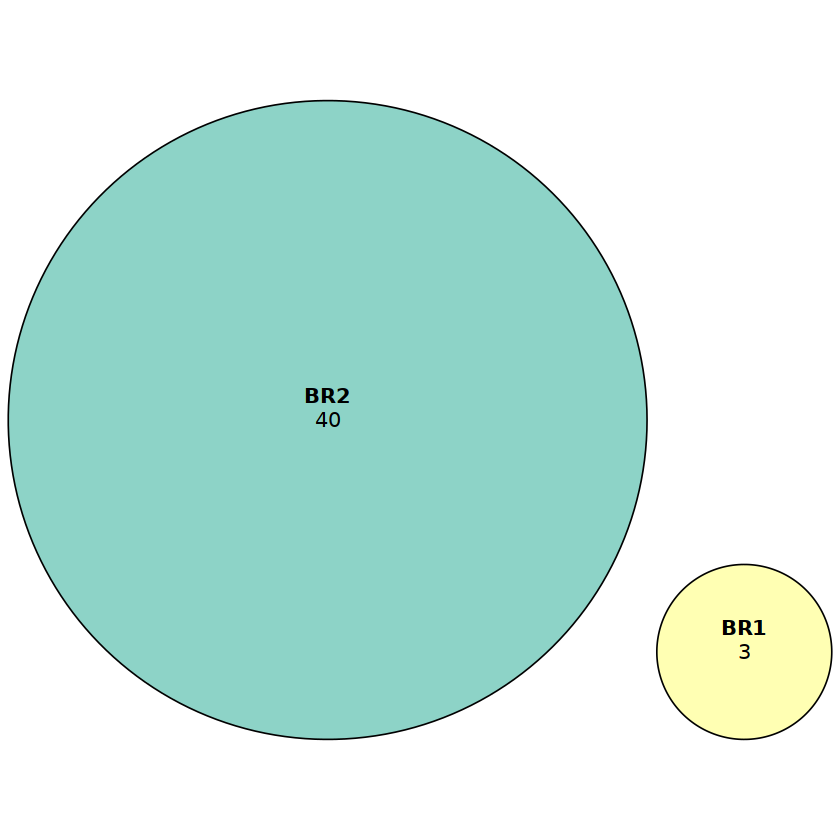

In [16]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")

# Set margin
# par(mar=c(7,20,5,20))  # Adjust margins (bottom, left, top, right)

# Specify colors and font size
plot(p1, quantities = list(fontface = 5),
    fill = RColorBrewer::brewer.pal(4, "Set3"),
    border = "transparent",
    auto.key = list(space = "right"))

# # Save the plot as PNG
# png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
# plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
#      font = 1:6,
#      labels = list(cex=1.5, fontsize =12),
#      fill = c("skyblue", "orange"))
# dev.off()  # Close the PNG device


# Male only Venn diagram BR1vsBR2

In [20]:
olink_male <- data %>% filter(Sex == 'M', padj <=0.05)
head(olink_male)
unique(olink_male$Expression)

,X.1,X,Estimate,Std..Error,t.value,Pr...t..,factor,Assay,Log2FC_Age,diff,padj,Sex,Expression
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1537,cohort.cohortGuidBR264,0.5997767,0.12368281,4.849313,2.123365e-05,Age,ACTA2,NA,0.6000621,3.104359e-02,M,Up-regulated-BR2
2,1602,cohort.cohortGuidBR2129,0.6494753,0.12774468,5.084167,1.020414e-05,Age,SOST,1.415697,0.6480369,1.492865e-02,M,Up-regulated-BR2
3,1671,cohort.cohortGuidBR2198,0.8138812,0.11725085,6.941367,2.952421e-08,Age,GDF15,NA,0.8162124,4.337106e-05,M,Up-regulated-BR2
4,1674,cohort.cohortGuidBR2201,0.6530751,0.07770770,8.404253,3.386372e-10,Age,LTBP2,NA,0.6548736,4.977967e-07,M,Up-regulated-BR2
5,1698,cohort.cohortGuidBR2225,0.3133376,0.06504459,4.817275,2.345616e-05,Age,DPT,2.041845,0.3160029,3.424600e-02,M,Up-regulated-BR2
6,1849,cohort.cohortGuidBR2376,0.4986720,0.08816931,5.655846,1.688426e-06,Age,WNT9A,NA,0.5014226,2.475233e-03,M,Up-regulated-BR2


[1] "Up-regulated-BR2"   "Down-regulated-BR2"

In [21]:
# Filter data for IL1B+ CD14 monocytes
degs_BR2 <- olink_male[olink_male$Expression == "Up-regulated-BR2", "Assay"]

# Filter data for all non-IL1B+ CD14 monocytes
degs_BR1 <- olink_male[olink_male$Expression != "Up-regulated-BR2", "Assay"]

# Remove duplicates from degs_IL1B_cd14
degs_BR2 <- unique(degs_BR2)

# Remove duplicates from degs_other_cd14
degs_BR1 <- unique(degs_BR1)

# Combine the two sets into one list variable 'a'
a <- list(`BR2` = degs_BR2, `BR1` = degs_BR1)

In [22]:
a

$BR2
 [1] "ACTA2"  "SOST"   "GDF15"  "LTBP2"  "DPT"    "WNT9A"  "MLN"    "CXCL17"
 [9] "FLT3LG" "EDA2R"  "WFDC2"  "SCARF2" "IGFBP4"

$BR1
[1] "RET"

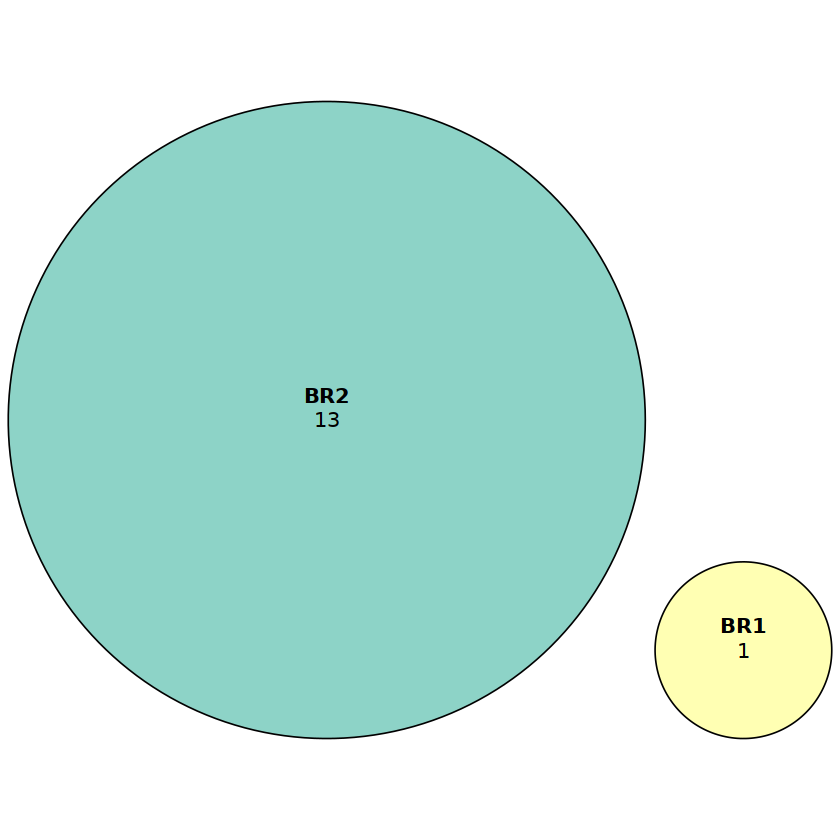

In [23]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")

# Set margin
# par(mar=c(7,20,5,20))  # Adjust margins (bottom, left, top, right)

# Specify colors and font size
plot(p1, quantities = list(fontface = 5),
    fill = RColorBrewer::brewer.pal(4, "Set3"),
    border = "transparent",
    auto.key = list(space = "right"))

# # Save the plot as PNG
# png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
# plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
#      font = 1:6,
#      labels = list(cex=1.5, fontsize =12),
#      fill = c("skyblue", "orange"))
# dev.off()  # Close the PNG device
